In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from numpy import dot
import math
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('all_wordcount.csv', encoding='CP949', index_col = 0)
print(df)

                        all  all_rate  kitten  kitten_rate  adult  adult_rate  \
ingredients                                                                     
taurine                 560  0.968858      58     0.983051    491    0.968442   
choline chloride        518  0.896194      50     0.847458    455    0.897436   
vitamin b12 supplement  449  0.776817      47     0.796610    391    0.771203   
copper sulfate          438  0.757785      43     0.728814    386    0.761341   
vitamin a supplement    433  0.749135      45     0.762712    379    0.747535   
...                     ...       ...     ...          ...    ...         ...   
ground limestone          1  0.001730       0     0.000000      0    0.000000   
taurine. b-415118-c.      1  0.001730       0     0.000000      1    0.001972   
bitter orange peel        1  0.001730       0     0.000000      1    0.001972   
organic alfalfa meal      1  0.001730       0     0.000000      1    0.001972   
wild boar                 1 

In [41]:
#all common
q = df[(df.iloc[:,3]!= 0) & (df.iloc[:,5] != 0) & (df.iloc[:,7] != 0)]
print(len(q))

#kitten
q1 = df[(df.iloc[:,3]!= 0) & (df.iloc[:,5] == 0) & (df.iloc[:,7] == 0)]
print(len(q1))

#adult
q2 = df[(df.iloc[:,3]== 0) & (df.iloc[:,5] != 0) & (df.iloc[:,7] == 0)]
print(len(q2))

#senior
q3 = df[(df.iloc[:,3]== 0) & (df.iloc[:,5] == 0) & (df.iloc[:,7] != 0)]
print(len(q3))

322
27
797
35


In [69]:
# print(q['ingredients'])
print(q)
# q.to_csv('공통 원료.csv', index=False) #csv파일로 저장
# q1.to_csv('kitten 특이적 원료.csv', index=False) #csv파일로 저장
# q2.to_csv('adult 특이적 원료.csv', index=False) #csv파일로 저장
# q3.to_csv('senior 특이적 원료.csv', index=False) 

                                                    all  all_rate  kitten  \
ingredients                                                                 
taurine                                             560  0.968858      58   
choline chloride                                    518  0.896194      50   
vitamin b12 supplement                              449  0.776817      47   
copper sulfate                                      438  0.757785      43   
vitamin a supplement                                433  0.749135      45   
...                                                 ...       ...     ...   
grapefruit                                            3  0.005190       1   
thiamine mononitrate)                                 3  0.005190       1   
manganese proteinate)                                 3  0.005190       1   
alfalfa sprouts                                       3  0.005190       1   
l-ascorbyl-2-polyphosphate??a source of vitamin c)    2  0.003460       1   

In [73]:
plot1 = q.iloc[:,[1,3,5,7]]
plot1.columns = ['all','kitten','adult','senior']
print(plot1)

                                                         all    kitten  \
ingredients                                                              
taurine                                             0.968858  0.983051   
choline chloride                                    0.896194  0.847458   
vitamin b12 supplement                              0.776817  0.796610   
copper sulfate                                      0.757785  0.728814   
vitamin a supplement                                0.749135  0.762712   
...                                                      ...       ...   
grapefruit                                          0.005190  0.016949   
thiamine mononitrate)                               0.005190  0.016949   
manganese proteinate)                               0.005190  0.016949   
alfalfa sprouts                                     0.005190  0.016949   
l-ascorbyl-2-polyphosphate??a source of vitamin c)  0.003460  0.016949   

                                     

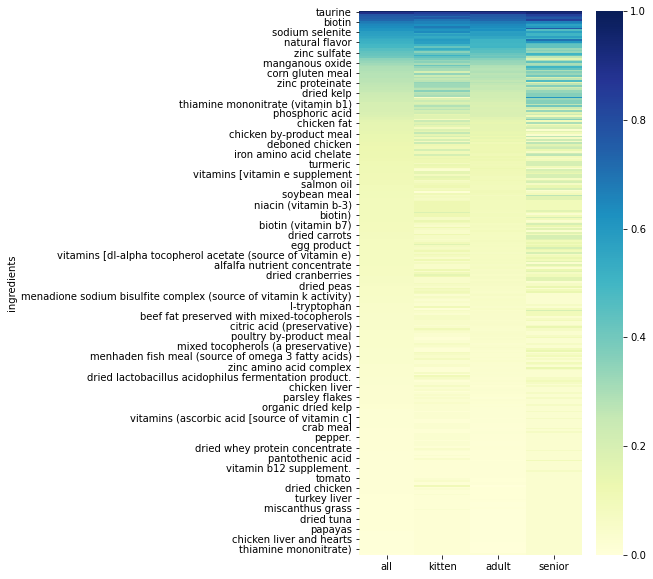

In [80]:
#heatmap by seaborn
fig, ax = plt.subplots( figsize=(5,10) )
plt.rcParams['font.size'] = 10
ax = sns.heatmap(plot1, 
                 annot= False ,
                 fmt = '.3f',
                 ax=ax,
                 vmin = 0,
                 vmax = 1,
                 annot_kws = {'size' : 7}, 
                 cmap='YlGnBu')
plt.show()
